#                                         BFS Capstone Project

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

Objective:
      The objective is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline


# Data Preparation


Data Loading

In [3]:
#importing csv file from web
Demographics = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/a790b665-7819-4490-87d9-b046340095fd/Demographic%20data.csv", sep=",")
CreditBureau = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3fa11a2f-f702-45e4-a7fd-17110148588d/Credit%20Bureau%20data.csv", sep=",")

Inspecting the dataframe

In [4]:
Demographics.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [5]:
CreditBureau.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [6]:
Demographics.shape

(71295, 12)

In [7]:
CreditBureau.shape

(71295, 19)

In [8]:
Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [9]:
CreditBureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [10]:
Demographics.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [11]:
CreditBureau.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [12]:
# Checking if the key field - Application ID is unique in Demographics Dataset
sum(Demographics.duplicated(subset = 'Application ID')) == 0


False

There are some duplicate entries present.

In [13]:
#Checing for duplicated Application ID
Demographics[Demographics.duplicated(['Application ID'])]

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


There are 3 duplicated Application Id

In [14]:
# Checking if the key field - Application ID is unique in CreditBureau Dataset
sum(CreditBureau.duplicated(subset = 'Application ID')) == 0

False

In [15]:
CreditBureau[CreditBureau.duplicated(['Application ID'])]

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


In [16]:
#Removing entries of duplicate application ids as it is not possible to identify the correct entry among duplicates
Demographics.drop_duplicates(subset ="Application ID", 
                     keep = False, inplace = True) 

In [17]:
#Removingentrie s of duplicate application ids as it is not possible to identify the correct entry among duplicates
CreditBureau.drop_duplicates(subset ="Application ID", 
                     keep = False, inplace = True) 

In [18]:
#Checking for all the entries present in both dataset because further we need to merge the datasets.
Demographics['Application ID'].isin(CreditBureau['Application ID']).value_counts()

True    71289
Name: Application ID, dtype: int64

In [19]:
Demographics.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [20]:
CreditBureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

There are 1425 records with no performance tag in both datasets which indicates that the applicant is not given credit card.
Only 1.99 % of the obs has NA values for - 'perfromance.tag'. 
Since Performance.Tag is the target variables, rows with NA's are removed and saved separately for future use.

In [21]:
#Removing Rows with no performance tag and saving it seperately from both datasets.
rejected_demographics = Demographics[Demographics['Performance Tag'].isna()]
Demographics=Demographics[~Demographics['Performance Tag'].isna()]
rejected_credit = CreditBureau[CreditBureau['Performance Tag'].isna()]
CreditBureau = CreditBureau[~CreditBureau['Performance Tag'].isna()]

In [22]:
# Taking backup of the Demograhics and creditBureau datasets
Demographics_woe=Demographics.copy()
CreditBureau_woe=CreditBureau.copy()

In [23]:
# Merging Demographics and CreditBureau Data to build a Master file
Master_Data=pd.merge(Demographics, CreditBureau, on=['Application ID'], how='inner')

In [24]:
Master_Data.shape

(69864, 30)

In [25]:
Master_Data.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           118
Profession                                                           13
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_x                                                     0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [26]:
Master_Data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [27]:
#since both the datasets have performance tag field checking if values of both the field are same.
Demographics['Performance Tag'].equals(CreditBureau['Performance Tag'])

True

As both the dataset having equal perfomance tag field we can delete one field from Master_Data

In [28]:
#deleting dulplicated Performance Tag field from Master_Data
#Master_Data=Master_Data.drop('Performance Tag_x',axis=1)

In [29]:
# Taking backup of the Master_Data datasets
Master_Data_woe=Master_Data.copy()

# WOE Analaysis and IV (Information Value)

This method is used to replace the missing values with woe values and find significant variables.

In [30]:
# Function to create woe buckets for variables
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [31]:
#applying binning function to Demographics Dataset
final_iv, IV = data_vars(Demographics_woe,Demographics_woe['Performance Tag'])

In [32]:
#Finding IV values of attributes in Demographics DAtaset.
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
8,No of months in current residence,0.052060
4,Income,0.037624
7,No of months in current company,0.012735
10,Profession,0.002217
11,Type of residence,0.000924
2,Education,0.000783
0,Age,0.000625
3,Gender,0.000325
5,Marital Status (at the time of application),0.000095
6,No of dependents,0.000056


Based on IV values, below are the top 3 significant variables from Demographics Datadet.

 
  No.of.months.in.current.residence     0.04875
  
  Income                                0.03596
  
  No.of.months.in.current.company       0.01095


In [33]:
transform_vars_list = (Demographics_woe.columns.difference(['Performance Tag']))
#transform_prefix = ' ' # leave this value blank if you need replace the original column values

In [34]:
transform_vars_list


Index(['Age', 'Application ID', 'Education', 'Gender', 'Income',
       'Marital Status (at the time of application)', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'Profession ', 'Type of residence'],
      dtype='object')

In [35]:
#function to assign woe values to demographics dataset.
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    small_df = small_df[~(small_df.MIN_VALUE.isnull())]
    small_df = small_df[~(small_df.MAX_VALUE.isnull())]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
           Demographics_woe[var] = Demographics_woe[var].apply(lambda x: eval(replace_cmd))
        except:
           Demographics_woe[var] = Demographics_woe[var].apply(lambda x: eval(replace_cmd1))

In [36]:
Demographics_woe.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,-0.004615,-0.007368,0.032129,-0.003997,0.005419,-0.243157,0.017390,-0.028033,-0.004319,0.206757,-0.122937,0.0
1,0.004596,0.031580,-0.010094,-0.003997,-0.010384,-0.262879,-0.017933,-0.013343,-0.004319,0.206757,-0.073182,0.0
2,-0.004615,0.031580,-0.010094,0.023383,0.005419,-0.262879,0.017390,-0.013343,-0.004319,0.206757,-0.073182,0.0
3,0.004596,-0.007368,-0.010094,-0.003997,0.005419,-0.262879,0.017390,0.091379,-0.004319,0.206757,-0.122937,0.0
4,0.004596,0.031580,0.032129,-0.003997,-0.010384,-0.243157,-0.017933,-0.028033,-0.004319,0.206757,-0.073182,0.0


In [37]:
#applying binning function to CreditBureau Dataset
final_iv, IV = data_vars(CreditBureau_woe,CreditBureau_woe['Performance Tag'])

In [38]:
#Finding IV values of attributes in CreditBureau Dataset.
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
1,Avgas CC Utilization in last 12 months,0.293831
12,No of trades opened in last 12 months,0.257429
2,No of Inquiries in last 12 months (excluding h...,0.229218
18,Total No of Trades,0.189907
6,No of times 30 DPD or worse in last 12 months,0.188045
4,No of PL trades opened in last 12 months,0.176644
7,No of times 30 DPD or worse in last 6 months,0.145708
8,No of times 60 DPD or worse in last 12 months,0.137676
5,No of PL trades opened in last 6 months,0.124744
10,No of times 90 DPD or worse in last 12 months,0.095714


Based on IV values, below are the top significant variables.

  Avgas.CC.Utilization.in.last.12.months 0.2935
  
  No of trades opened in last 12 months  0.2574
   
  No of Inquiries in last 12 months (excluding h...  0.2292
                                     
  No of times 30 DPD or worse in last 12 months   0.188045
  
     

In [39]:
#applying binning function to Master_Data_woe Dataset
final_iv, IV = data_vars(Master_Data_woe,Master_Data_woe['Performance Tag_y'])

In [40]:
#Finding IV values of attributes in Master_Data_woe Dataset.
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
2,Avgas CC Utilization in last 12 months,0.293831
20,No of trades opened in last 12 months,0.257429
7,No of Inquiries in last 12 months (excluding h...,0.229218
28,Total No of Trades,0.189907
14,No of times 30 DPD or worse in last 12 months,0.188045
9,No of PL trades opened in last 12 months,0.176644
15,No of times 30 DPD or worse in last 6 months,0.145708
16,No of times 60 DPD or worse in last 12 months,0.137676
10,No of PL trades opened in last 6 months,0.124744
18,No of times 90 DPD or worse in last 12 months,0.095714


On the combined Demographic and CreditBureau data i.e Master_data the IV values of Attributes of CreditBureau are higher than Attributes Demographics
dataset.
It shows that Attributes of CreditBureau data plays Significant role.

In [41]:
transform_vars_list = (Master_Data_woe.columns.difference(['Performance Tag_x']))

In [42]:
transform_vars_list

Index(['Age', 'Application ID', 'Avgas CC Utilization in last 12 months',
       'Education', 'Gender', 'Income',
       'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Performance Tag_y', 'Prese

In [43]:
#function to assign woe values to  Master_Data_woe dataset.
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    small_df = small_df[~(small_df.MIN_VALUE.isnull())]
    small_df = small_df[~(small_df.MAX_VALUE.isnull())]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
           Master_Data_woe[var] = Master_Data_woe[var].apply(lambda x: eval(replace_cmd))
        except:
           Master_Data_woe[var] = Master_Data_woe[var].apply(lambda x: eval(replace_cmd1))

In [44]:
Master_Data_woe.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,-0.004615,-0.007368,0.032129,-0.003997,0.005419,-0.243157,0.017390,-0.028033,-0.004319,0.206757,...,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973,0.0
1,0.004596,0.031580,-0.010094,-0.003997,-0.010384,-0.262879,-0.017933,-0.013343,-0.004319,0.206757,...,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,-0.093345,0.210325,0.011973,0.0
2,-0.004615,0.031580,-0.010094,0.023383,0.005419,-0.262879,0.017390,-0.013343,-0.004319,0.206757,...,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973,0.0
3,0.004596,-0.007368,-0.010094,-0.003997,0.005419,-0.262879,0.017390,0.091379,-0.004319,0.206757,...,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,-0.138237,0.0
4,0.004596,0.031580,0.032129,-0.003997,-0.010384,-0.243157,-0.017933,-0.028033,-0.004319,0.206757,...,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973,0.0


In [45]:
#Overall default Rate
round(np.mean(Master_Data_woe['Performance Tag_x']), 3)

0.042

So the overall default rate is 4.2%.

let's now visualise dafault rate across various categorical variables.

In [46]:
# function to plot categorical variables
def plot_cat(cat_var):
    sns.countplot(x=cat_var, data=Demographics)
    plt.show()

In [47]:
# function to plot performance tag across categorical variables
def plot_cat_per(cat_var):
    sns.countplot(x=cat_var,hue='Performance Tag', data=Demographics)
    plt.show()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

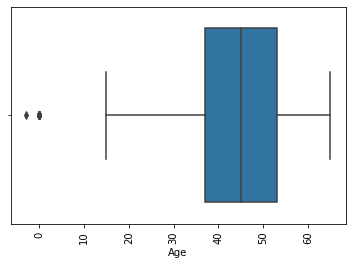

In [48]:
sns.boxplot(x = "Age", data = Demographics)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

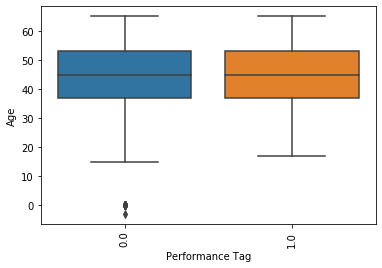

In [49]:
sns.boxplot(x = "Performance Tag",y="Age", data = Demographics)
xticks(rotation = 90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

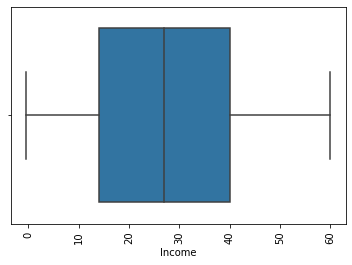

In [50]:
sns.boxplot(x = "Income", data = Demographics)
xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

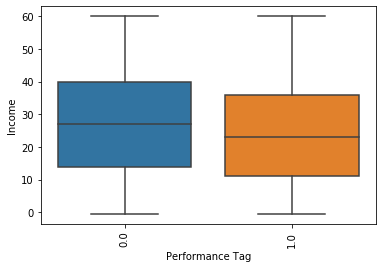

In [51]:
sns.boxplot(x = "Performance Tag",y="Income", data = Demographics)
xticks(rotation = 90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

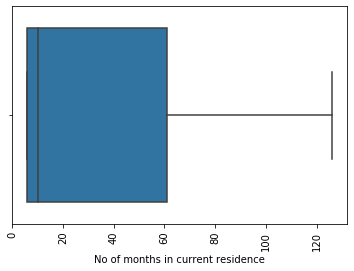

In [52]:
sns.boxplot(x = "No of months in current residence", data = Demographics)
xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

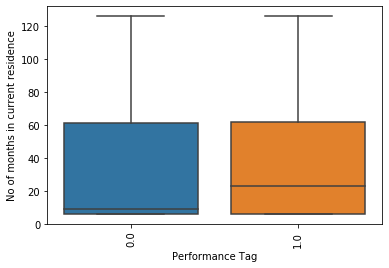

In [53]:
sns.boxplot(x = "Performance Tag",y="No of months in current residence", data = Demographics)
xticks(rotation = 90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text xticklabel objects>)

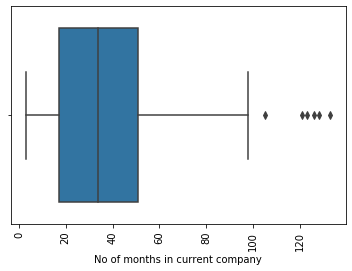

In [54]:
sns.boxplot(x = "No of months in current company", data = Demographics)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

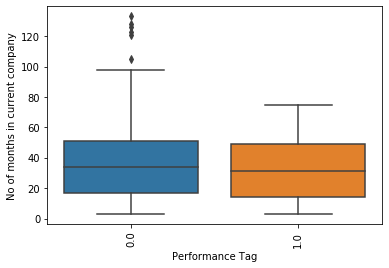

In [55]:
sns.boxplot(x = "Performance Tag",y="No of months in current company", data = Demographics)
xticks(rotation = 90)

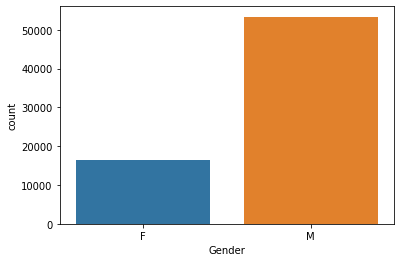

In [56]:
#plotting default rates across term of loan
plot_cat('Gender')

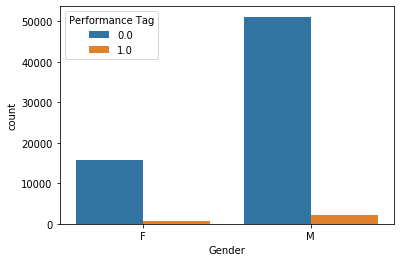

In [57]:
plot_cat_per('Gender')

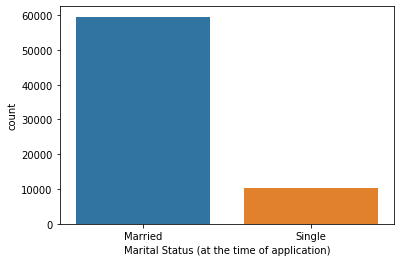

In [58]:
plot_cat('Marital Status (at the time of application)')

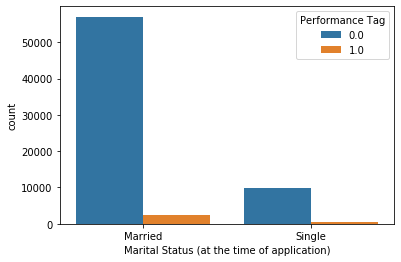

In [59]:
plot_cat_per('Marital Status (at the time of application)')

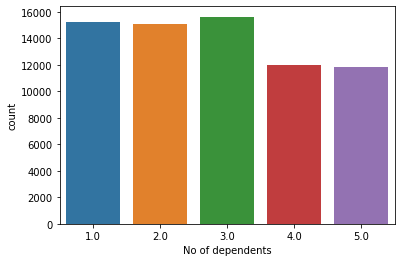

In [60]:
plot_cat('No of dependents')

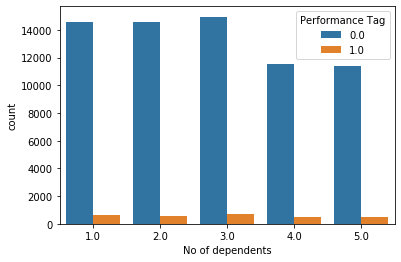

In [61]:
plot_cat_per('No of dependents')

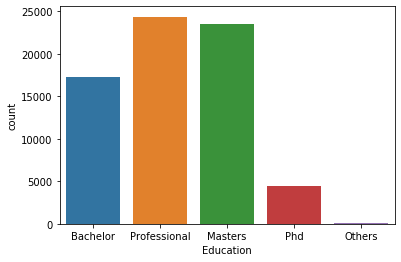

In [62]:
plot_cat('Education')

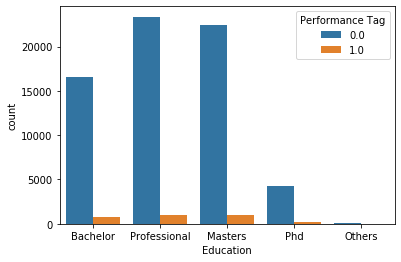

In [63]:
plot_cat_per('Education')

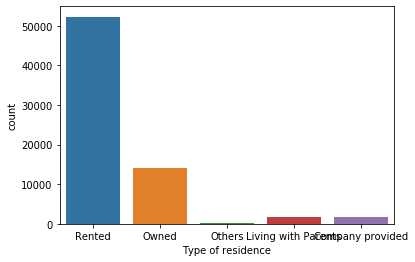

In [64]:
plot_cat('Type of residence')

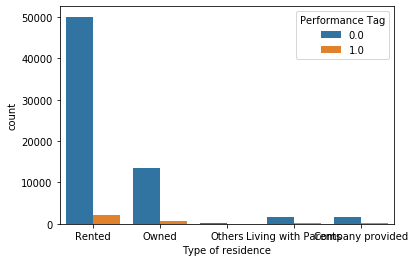

In [65]:
plot_cat_per('Type of residence')

In [66]:
Master_Data.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           118
Profession                                                           13
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_x                                                     0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [67]:
# function to plot performance tag across all attributes in CreditBureau Dataset
def plot_cat_credit(cat_var):
    sns.countplot(x=cat_var,hue='Performance Tag', data=CreditBureau)
    plt.show()

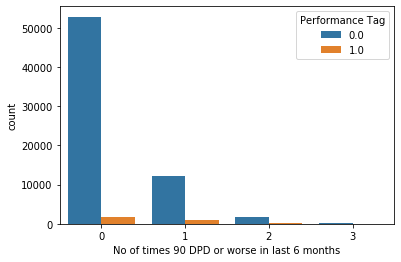

In [68]:
plot_cat_credit('No of times 90 DPD or worse in last 6 months')

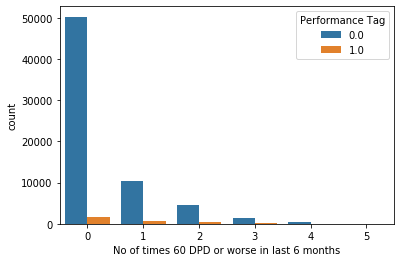

In [69]:
plot_cat_credit('No of times 60 DPD or worse in last 6 months')

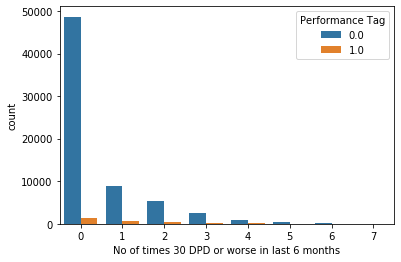

In [70]:
plot_cat_credit('No of times 30 DPD or worse in last 6 months')

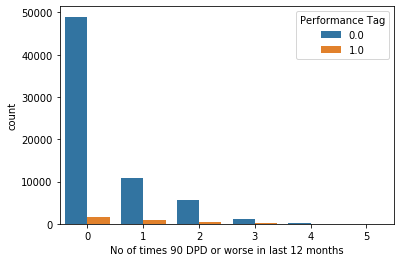

In [71]:
plot_cat_credit('No of times 90 DPD or worse in last 12 months')

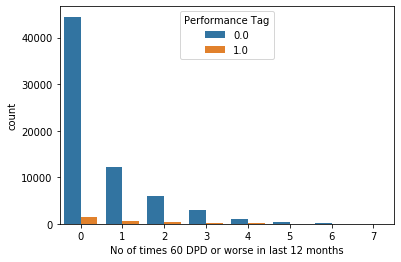

In [72]:
plot_cat_credit('No of times 60 DPD or worse in last 12 months')

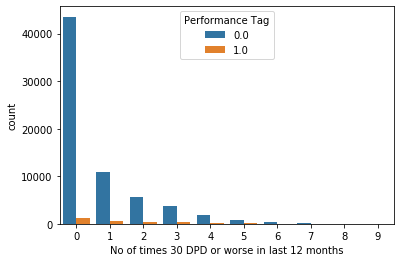

In [73]:
plot_cat_credit('No of times 30 DPD or worse in last 12 months')

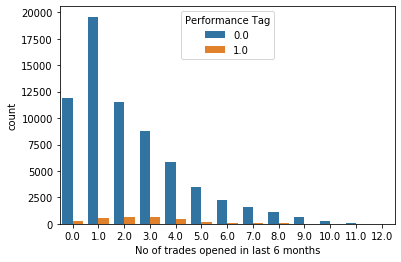

In [74]:
plot_cat_credit('No of trades opened in last 6 months')

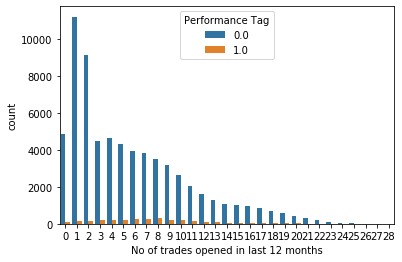

In [75]:
plot_cat_credit('No of trades opened in last 12 months')

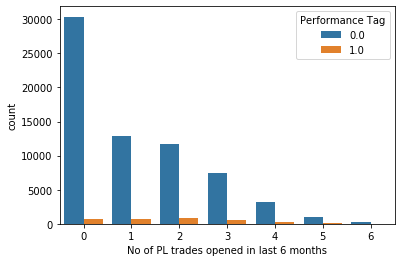

In [76]:
plot_cat_credit('No of PL trades opened in last 6 months')

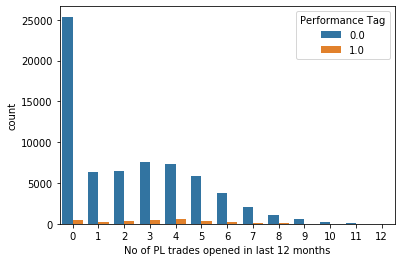

In [77]:
plot_cat_credit('No of PL trades opened in last 12 months')

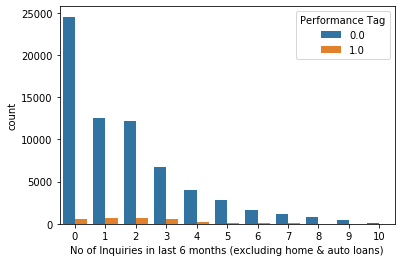

In [78]:
plot_cat_credit('No of Inquiries in last 6 months (excluding home & auto loans)')

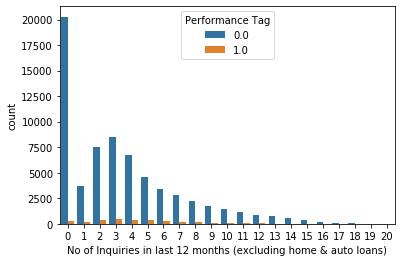

In [79]:
plot_cat_credit('No of Inquiries in last 12 months (excluding home & auto loans)')

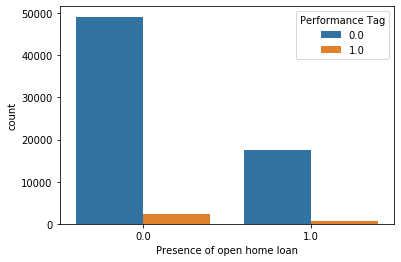

In [80]:
plot_cat_credit('Presence of open home loan')

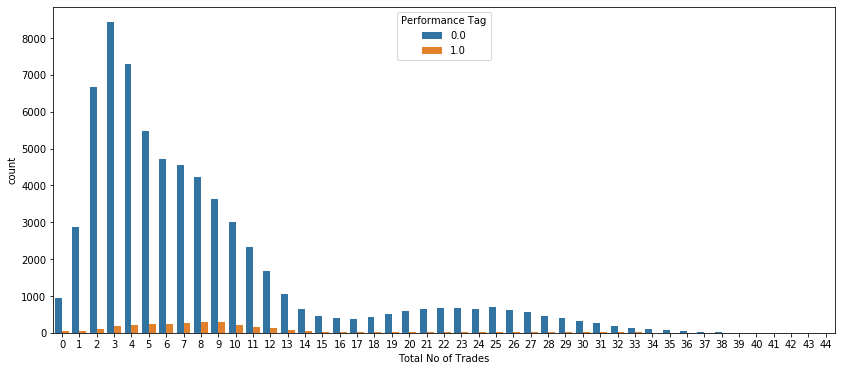

In [81]:
plt.figure(figsize=(14, 6))
plot_cat_credit('Total No of Trades')

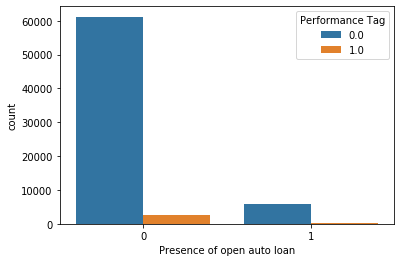

In [82]:
plot_cat_credit('Presence of open auto loan')

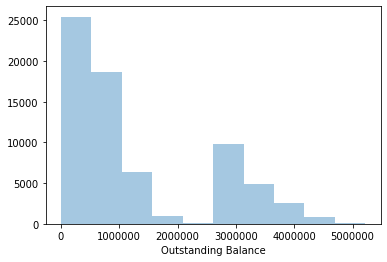

In [83]:
sns.distplot(CreditBureau['Outstanding Balance'], bins=10, kde=False)

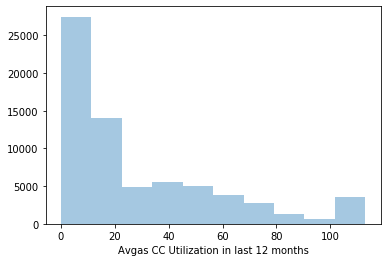

In [84]:
sns.distplot(CreditBureau['Avgas CC Utilization in last 12 months'], bins=10, kde=False)

# Model Building

# 1.Demographics_woe:Logistic Regression

In [85]:
# Putting feature variable to X
X = Demographics_woe.drop(['Performance Tag','Application ID'],axis=1)

X.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,-0.007368,0.032129,-0.003997,0.005419,-0.243157,0.017390,-0.028033,-0.004319,0.206757,-0.122937
1,0.031580,-0.010094,-0.003997,-0.010384,-0.262879,-0.017933,-0.013343,-0.004319,0.206757,-0.073182
2,0.031580,-0.010094,0.023383,0.005419,-0.262879,0.017390,-0.013343,-0.004319,0.206757,-0.073182
3,-0.007368,-0.010094,-0.003997,0.005419,-0.262879,0.017390,0.091379,-0.004319,0.206757,-0.122937
4,0.031580,0.032129,-0.003997,-0.010384,-0.243157,-0.017933,-0.028033,-0.004319,0.206757,-0.073182


In [86]:
# Putting response variable to y
y = Demographics_woe['Performance Tag']

y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag, dtype: float64

In [87]:
#Scaling the features with standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[['Age','Gender','Marital Status (at the time of application)','Income']] = scaler.fit_transform(X[['Age','Gender','Marital Status (at the time of application)','Income']])

X.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,-0.283750,1.797947,-0.416258,0.005419,-1.168477,0.017390,-0.028033,-0.004319,0.206757,-0.122937
1,1.276738,-0.556206,-0.416258,-0.010384,-1.270465,-0.017933,-0.013343,-0.004319,0.206757,-0.073182
2,1.276738,-0.556206,2.402563,0.005419,-1.270465,0.017390,-0.013343,-0.004319,0.206757,-0.073182
3,-0.283750,-0.556206,-0.416258,0.005419,-1.270465,0.017390,0.091379,-0.004319,0.206757,-0.122937
4,1.276738,1.797947,-0.416258,-0.010384,-1.168477,-0.017933,-0.028033,-0.004319,0.206757,-0.073182


In [88]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [89]:
#Imbalance in dataset
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)

y_train_imb=(y_train !=0).sum()/(y_train==0).sum()
y_test_imb=(y_test !=0).sum()/(y_test==0).sum()

print("Imbalance in Train Data :",y_train_imb)
print("Imbalance in Test Data :",y_test_imb)


X_train Shape: (48904, 10)
X_test Shape: (20960, 10)
Imbalance in Train Data : 0.04406490179333902
Imbalance in Test Data : 0.043980674403546346


In [90]:
#Balancing Dataset

from imblearn.over_sampling import SMOTE

sm=SMOTE(kind="regular")
X_tr,y_tr=sm.fit_sample(X_train,y_train)

In [91]:
print("X_tr Shape",X_tr.shape)
print("y_tr Shape",y_tr.shape)

imb=(y_tr!=0).sum()/(y_tr==0).sum()
print("Imbalance in Train Data :",imb)

X_tr Shape (93680, 10)
y_tr Shape (93680,)
Imbalance in Train Data : 1.0


RFE

In [92]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 5)   
rfe = rfe.fit(X_tr, y_tr)

In [93]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False,  True,
        True])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 6),
 ('Gender', False, 4),
 ('Marital Status (at the time of application)', False, 5),
 ('No of dependents', True, 1),
 ('Income', False, 2),
 ('Education', True, 1),
 ('Profession ', True, 1),
 ('Type of residence', False, 3),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1)]

In [95]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
#Confusion Matrix
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10131  9946]
 [  333   550]]


In [98]:
#Accuracy of Logistic Regression Model on test set 
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.5095896946564885


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.50      0.66     20077
         1.0       0.05      0.62      0.10       883

    accuracy                           0.51     20960
   macro avg       0.51      0.56      0.38     20960
weighted avg       0.93      0.51      0.64     20960



# 2.Demographics_woe: Random Forest

Random Forest with Default Hyperparameters

In [100]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_tr, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Random Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Random Forest Accuracy with Default Hyperparameter 0.9294847328244275


In [102]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     20077
         1.0       0.05      0.04      0.04       883

    accuracy                           0.93     20960
   macro avg       0.50      0.50      0.50     20960
weighted avg       0.92      0.93      0.92     20960



In [103]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [104]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [105]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5188128121306884
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [106]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[18737  1340]
 [  807    76]]
Sensitivity: 	0.09
Specificity: 	0.93
AUC:    	 0.51


# Master_Data_woe:Logistic Regression

In [107]:
# Putting feature variable to X
X = Master_Data_woe.drop(['Performance Tag_x','Performance Tag_y','Application ID'],axis=1)

X.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,-0.007368,0.032129,-0.003997,0.005419,-0.243157,0.017390,-0.028033,-0.004319,0.206757,-0.122937,...,-0.270746,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973
1,0.031580,-0.010094,-0.003997,-0.010384,-0.262879,-0.017933,-0.013343,-0.004319,0.206757,-0.073182,...,-0.270746,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,-0.093345,0.210325,0.011973
2,0.031580,-0.010094,0.023383,0.005419,-0.262879,0.017390,-0.013343,-0.004319,0.206757,-0.073182,...,-0.270746,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973
3,-0.007368,-0.010094,-0.003997,0.005419,-0.262879,0.017390,0.091379,-0.004319,0.206757,-0.122937,...,-0.270746,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,-0.138237
4,0.031580,0.032129,-0.003997,-0.010384,-0.243157,-0.017933,-0.028033,-0.004319,0.206757,-0.073182,...,-0.270746,-0.865089,-0.314635,-0.453113,-0.320076,-0.828287,0.001235,0.088272,-0.686175,0.011973


In [108]:
# Putting response variable to y
y = Master_Data_woe['Performance Tag_x']

y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag_x, dtype: float64

In [109]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [110]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression

# grid search CV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# set up cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

## using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced')
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   56.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [111]:
## reviewing the results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.176800,0.009928,0.010402,0.004799,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.680387,0.685230,0.707022,...,0.693321,0.012030,2,0.697153,0.691096,0.684434,0.697759,0.707022,0.695493,0.007516
1,0.220800,0.022256,0.008802,0.001599,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.685230,0.682809,0.723971,...,0.691376,0.017360,3,0.692913,0.692913,0.689885,0.688068,0.690678,0.690891,0.001855
2,0.196795,0.018135,0.008000,0.000002,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.685230,0.687651,0.721550,...,0.693796,0.013963,1,0.695336,0.698970,0.690491,0.693519,0.685835,0.692830,0.004447
3,0.315206,0.021235,0.009600,0.001961,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.677966,0.682809,0.723971,...,0.690406,0.017292,10,0.690491,0.694730,0.690491,0.688068,0.690073,0.690770,0.002174
4,0.275201,0.008909,0.008800,0.001601,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.675545,0.687651,0.719128,...,0.688951,0.015703,14,0.686856,0.696548,0.692913,0.688068,0.693099,0.691497,0.003560
5,0.483199,0.038233,0.010407,0.001963,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.680387,0.685230,0.726392,...,0.689919,0.018503,12,0.689279,0.697153,0.689885,0.686251,0.693099,0.691133,0.003713
6,0.325600,0.009666,0.008800,0.001601,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.680387,0.685230,0.726392,...,0.689920,0.018735,11,0.686856,0.698970,0.690491,0.687462,0.691283,0.691013,0.004326
7,0.777600,0.069999,0.010400,0.001960,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.677966,0.682809,0.726392,...,0.689436,0.018756,13,0.687462,0.696548,0.689885,0.686856,0.691283,0.690407,0.003465
8,0.346403,0.028576,0.008799,0.001598,10,l1,"{'C': 10.0, 'penalty': 'l1'}",0.682809,0.682809,0.726392,...,0.690890,0.018125,4,0.688068,0.697759,0.689279,0.685645,0.690678,0.690286,0.004086
9,1.059200,0.094569,0.008801,0.001600,10,l2,"{'C': 10.0, 'penalty': 'l2'}",0.682809,0.682809,0.726392,...,0.690890,0.018125,4,0.688068,0.698365,0.689279,0.685645,0.690678,0.690407,0.004309


In [112]:
## segerigating results for L1 and L2 regression and plotting them differently
cv_results_penalty_l1 = cv_results.loc[cv_results['param_penalty']=='l1']
cv_results_penalty_l2 = cv_results.loc[cv_results['param_penalty']=='l2']

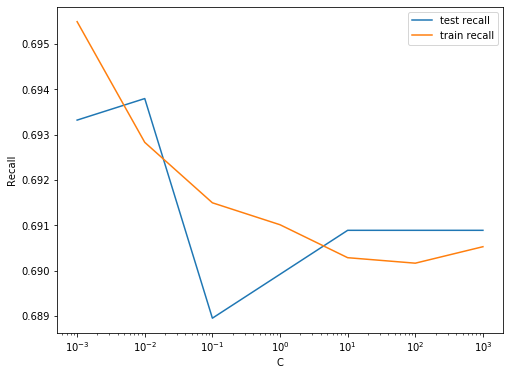

In [113]:
## plotting results for Logistic regression with L1 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_test_score'])
plt.plot(cv_results_penalty_l1['param_C'], cv_results_penalty_l1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

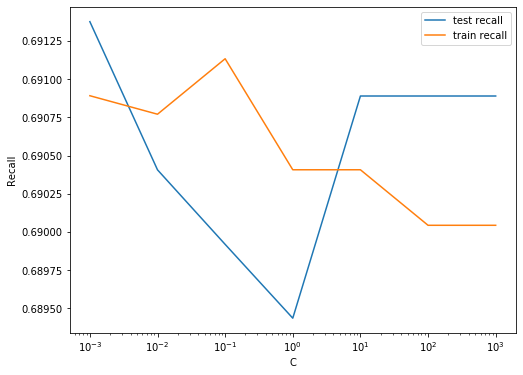

In [114]:
## plotting results for Logistic regression with L2 panelty
plt.figure(figsize=(8, 6))
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_test_score'])
plt.plot(cv_results_penalty_l2['param_C'], cv_results_penalty_l2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper right')
plt.xscale('log')

In [115]:
## checking best score
best_score = model_cv.best_score_
best_param = model_cv.best_params_

print(" The highest test recall is {0} at {1}".format(best_score, best_param))

 The highest test recall is 0.693796372583795 at {'C': 0.01, 'penalty': 'l1'}


In [116]:
## preparing final model based on best score
model=LogisticRegression(C=0.1,penalty="l1",class_weight='balanced')
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)

# metrics
# print other metrics

print(metrics.confusion_matrix(y_test, y_pred))

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

[[11358  8719]
 [  261   622]]
accuracy 0.5715648854961832
precision 0.06658815972593941
recall 0.7044167610419027


In [117]:
## lasso model parameters
model_parameters =list(model.coef_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
list(zip(cols, model_parameters))

[('Age', 0.0),
 ('Gender', 0.0),
 ('Marital Status (at the time of application)', 0.0),
 ('No of dependents', 0.0),
 ('Income', 0.128),
 ('Education', 0.0),
 ('Profession ', 0.0),
 ('Type of residence', 0.0),
 ('No of months in current residence', -0.18),
 ('No of months in current company', 0.341),
 ('No of times 90 DPD or worse in last 6 months', 0.059),
 ('No of times 60 DPD or worse in last 6 months', 0.0),
 ('No of times 30 DPD or worse in last 6 months', 0.039),
 ('No of times 90 DPD or worse in last 12 months', 0.057),
 ('No of times 60 DPD or worse in last 12 months', 0.008),
 ('No of times 30 DPD or worse in last 12 months', 0.403),
 ('Avgas CC Utilization in last 12 months', 0.502),
 ('No of trades opened in last 6 months', -0.001),
 ('No of trades opened in last 12 months', 0.339),
 ('No of PL trades opened in last 6 months', 0.111),
 ('No of PL trades opened in last 12 months', 0.134),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', -0.214),
 ('No of Inq

In [118]:
# Getting the predicted values on the train set
y_train_pred = model.predict_proba(X_train)[:,1]
y_train_pred[:10]

array([0.27003357, 0.56647015, 0.70530491, 0.23960217, 0.24253464,
       0.56459438, 0.55114028, 0.34027504, 0.45841856, 0.25404764])

In [119]:
#Creating a dataframe with the actual performance and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Performance':y_train.values, 'performance_prob':y_train_pred})
y_train_pred_final['Application ID'] = y_train.index
y_train_pred_final.head()

,Performance,performance_prob,Application ID
0,0.0,0.270034,16415
1,0.0,0.566470,34570
2,1.0,0.705305,61611
3,0.0,0.239602,1771
4,0.0,0.242535,10562


In [120]:
#Creating new column 'predicted_performance' with 1 if converted_Prob > 0.5 else 0
y_train_pred_final['predicted_performance'] = y_train_pred_final.performance_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Performance,performance_prob,Application ID,predicted_performance
0,0.0,0.270034,16415,0
1,0.0,0.566470,34570,1
2,1.0,0.705305,61611,1
3,0.0,0.239602,1771,0
4,0.0,0.242535,10562,0


Confusion matrix

In [121]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Performance, y_train_pred_final.predicted_performance )
print(confusion)

[[26569 20271]
 [  637  1427]]


In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Performance, y_train_pred_final.predicted_performance))

0.5724685097333552


# Metrics beyond simply accuracy


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6913759689922481

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.5672288642186165

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.43277113578138343


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.06576643008572218


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9765860471954716


# Plotting the ROC Curve

An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
thresholds = metrics.roc_curve( y_train_pred_final.Performance, y_train_pred_final.performance_prob, drop_intermediate = False )

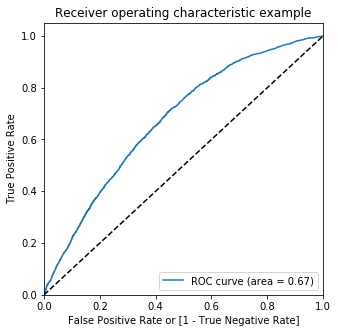

In [131]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt
# Call the ROC function

draw_roc(y_train_pred_final.Performance, y_train_pred_final.performance_prob)

In [132]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Performance,performance_prob,Application ID,predicted_performance,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.270034,16415,0,1,1,1,0,0,0,0,0,0,0
1,0.0,0.566470,34570,1,1,1,1,1,1,1,0,0,0,0
2,1.0,0.705305,61611,1,1,1,1,1,1,1,1,1,0,0
3,0.0,0.239602,1771,0,1,1,1,0,0,0,0,0,0,0
4,0.0,0.242535,10562,0,1,1,1,0,0,0,0,0,0,0


In [133]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Performance, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042205  1.000000  0.000000
0.1   0.1  0.042205  1.000000  0.000000
0.2   0.2  0.042205  1.000000  0.000000
0.3   0.3  0.319422  0.909884  0.293403
0.4   0.4  0.416858  0.842539  0.398100
0.5   0.5  0.572469  0.691376  0.567229
0.6   0.6  0.790978  0.380329  0.809073
0.7   0.7  0.927491  0.088178  0.964475
0.8   0.8  0.957795  0.000000  1.000000
0.9   0.9  0.957795  0.000000  1.000000


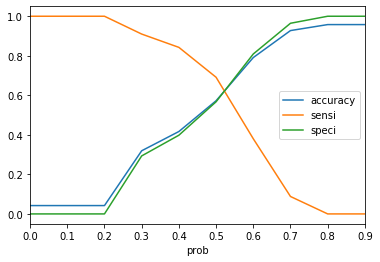

In [134]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [135]:
#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Performance,performance_prob,Application ID,predicted_performance,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.270034,16415,0,1,1,1,0,0,0,0,0,0,0,0
1,0.0,0.566470,34570,1,1,1,1,1,1,1,0,0,0,0,1
2,1.0,0.705305,61611,1,1,1,1,1,1,1,1,1,0,0,1
3,0.0,0.239602,1771,0,1,1,1,0,0,0,0,0,0,0,0
4,0.0,0.242535,10562,0,1,1,1,0,0,0,0,0,0,0,0


# Master_Data_woe:Random Forest

In [136]:
# Putting feature variable to X
X = Master_Data_woe.drop(['Performance Tag_x','Performance Tag_y','Application ID'],axis=1)



# Putting response variable to y
y = Master_Data_woe['Performance Tag_x']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [137]:
#Balancing Dataset

from imblearn.over_sampling import SMOTE

sm=SMOTE(kind="regular")
X_tr,y_tr=sm.fit_sample(X_train,y_train)

In [138]:
print("X_tr Shape",X_tr.shape)
print("y_tr Shape",y_tr.shape)

imb=(y_tr!=0).sum()/(y_tr==0).sum()
print("Imbalance in Train Data :",imb)

X_tr Shape (93680, 27)
y_tr Shape (93680,)
Imbalance in Train Data : 1.0


Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [139]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [140]:
# fit
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
# Making predictions
predictions = rfc.predict(X_test)

In [142]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [143]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20077
         1.0       0.10      0.01      0.01       883

    accuracy                           0.96     20960
   macro avg       0.53      0.50      0.49     20960
weighted avg       0.92      0.96      0.94     20960



In [144]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[20022    55]
 [  877     6]]


In [145]:
print(accuracy_score(y_test,predictions))

0.9555343511450382


In [146]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'max_depth': range(10,110,10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [147]:
# fit
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.882016,0.064038,0.042998,0.001731,10,{'max_depth': 10},0.897267,0.977839,0.979035,0.976729,0.957718,0.034911,10,0.983134,0.952334,0.952946,0.950726,0.959785,0.013505
1,1.001019,0.018416,0.059000,0.001733,20,{'max_depth': 20},0.910376,0.997908,0.997267,0.997609,0.975790,0.037768,1,0.999587,0.987660,0.986835,0.986948,0.990258,0.005396
2,1.035006,0.016090,0.057999,0.003463,30,{'max_depth': 30},0.910290,0.996968,0.996798,0.997523,0.975395,0.037589,4,0.999772,0.993524,0.993851,0.993638,0.995196,0.002644
3,1.024006,0.029535,0.060994,0.004362,40,{'max_depth': 40},0.910248,0.996584,0.996926,0.997267,0.975256,0.037533,6,0.999829,0.993567,0.993367,0.993353,0.995029,0.002773
4,1.030005,0.025692,0.060001,0.002838,50,{'max_depth': 50},0.910675,0.996798,0.997353,0.997267,0.975523,0.037441,2,0.999872,0.993923,0.993780,0.993353,0.995232,0.002687


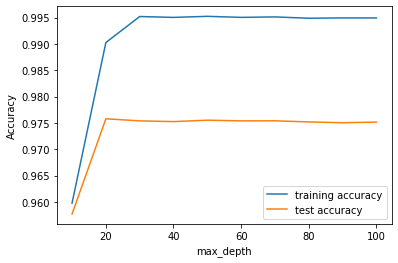

In [149]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [150]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [151]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.659213,0.365596,0.177604,0.004082,100,{'n_estimators': 100},0.803800,0.856373,0.872118,0.868809,...,0.853405,0.025352,3,0.879297,0.840988,0.853504,0.855892,0.846232,0.855183,0.013164
1,29.352809,1.586170,0.936798,0.062135,500,{'n_estimators': 500},0.807376,0.868969,0.868328,0.861817,...,0.856736,0.025158,2,0.883446,0.855439,0.850195,0.848340,0.856947,0.858873,0.012693
2,52.985612,2.174929,1.670395,0.103373,900,{'n_estimators': 900},0.808177,0.867581,0.875320,0.864699,...,0.857910,0.025170,1,0.884073,0.853531,0.855132,0.851996,0.853878,0.859722,0.012217
3,70.494424,1.167608,2.255995,0.010728,1300,{'n_estimators': 1300},0.806255,0.863471,0.868862,0.857387,...,0.853117,0.023838,4,0.882152,0.850755,0.850195,0.845111,0.850408,0.855724,0.013376


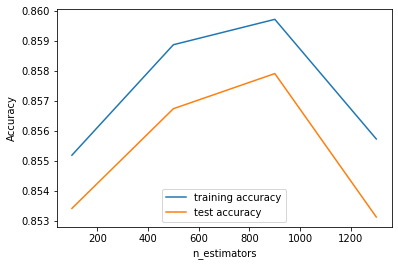

In [152]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [153]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.529602,0.072205,0.026404,0.003196,4,{'max_features': 4},0.776046,0.815062,0.855892,0.838706,...,0.828715,0.030492,5,0.844444,0.803680,0.839627,0.828552,0.839867,0.831234,0.014737
1,0.912813,0.055741,0.023204,0.004660,8,{'max_features': 8},0.793819,0.828779,0.868275,0.815489,...,0.830156,0.025274,4,0.870303,0.816463,0.849381,0.806415,0.827525,0.834017,0.023086
2,1.276806,0.073898,0.024000,0.002531,14,{'max_features': 14},0.822588,0.859789,0.879750,0.860536,...,0.869631,0.033512,1,0.915777,0.839093,0.856119,0.844404,0.902127,0.871504,0.031367
3,1.613607,0.068113,0.024800,0.001600,20,{'max_features': 20},0.796862,0.868328,0.883059,0.853651,...,0.860504,0.035430,2,0.876041,0.852343,0.861003,0.835757,0.877882,0.860605,0.015637
4,1.843223,0.016665,0.022388,0.001951,24,{'max_features': 24},0.745730,0.875320,0.848153,0.862244,...,0.831213,0.045926,3,0.810512,0.859148,0.823815,0.845018,0.809618,0.829622,0.019534


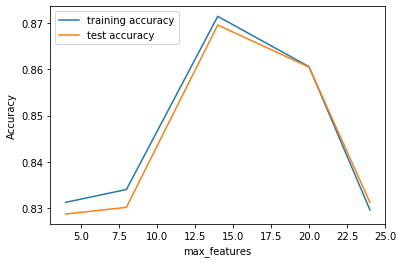

In [155]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Let's now check the optimum value for min samples leaf in our case.

In [156]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

Tuning min_samples_leaf


In [157]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.921595,0.020334,0.036009,0.000013,100,{'min_samples_leaf': 100},0.866247,0.967656,0.970004,0.969310,...,0.948708,0.041241,1,0.970792,0.944118,0.946400,0.944986,0.948588,0.950977,0.010022
1,0.896003,0.015593,0.034405,0.001965,150,{'min_samples_leaf': 150},0.862991,0.965414,0.964720,0.966749,...,0.945698,0.041375,2,0.967643,0.942250,0.941143,0.941957,0.943464,0.947291,0.010203
2,0.899202,0.004664,0.032806,0.001612,200,{'min_samples_leaf': 200},0.857814,0.951003,0.950950,0.959596,...,0.935013,0.038734,3,0.959610,0.928814,0.927893,0.935205,0.932390,0.936782,0.011708
3,0.872801,0.034817,0.032006,0.000010,250,{'min_samples_leaf': 250},0.849861,0.948388,0.951751,0.953565,...,0.932504,0.041463,4,0.947841,0.927559,0.927439,0.930428,0.932750,0.933203,0.007580
4,0.844807,0.029766,0.031999,0.000018,300,{'min_samples_leaf': 300},0.849381,0.934031,0.950737,0.941396,...,0.923345,0.037361,5,0.948295,0.916257,0.925611,0.920047,0.918833,0.925809,0.011651


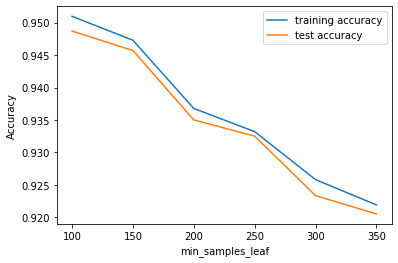

In [159]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split


In [160]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.991999,0.039759,0.037605,0.001955,200,{'min_samples_split': 200},0.878149,0.988151,0.987137,0.986817,...,0.965660,0.043758,1,0.987511,0.962519,0.962198,0.961558,0.961918,0.967141,0.010190
1,1.005594,0.063230,0.037604,0.001955,250,{'min_samples_split': 250},0.876761,0.983454,0.984789,0.985482,...,0.963386,0.043323,2,0.984882,0.958849,0.958396,0.960424,0.961598,0.964830,0.010091
2,0.931209,0.012997,0.037593,0.001952,300,{'min_samples_split': 300},0.875961,0.982547,0.982333,0.984362,...,0.961902,0.042979,3,0.983014,0.957595,0.957355,0.958316,0.959129,0.963082,0.009985
3,0.934400,0.030633,0.036005,0.000011,350,{'min_samples_split': 350},0.875053,0.982867,0.981693,0.981853,...,0.960269,0.042619,4,0.981226,0.958089,0.955954,0.957675,0.954219,0.961433,0.009991
4,0.960005,0.024275,0.035192,0.001597,400,{'min_samples_split': 400},0.873879,0.976356,0.976462,0.973420,...,0.955412,0.040785,6,0.981159,0.952191,0.952084,0.949923,0.952925,0.957656,0.011794


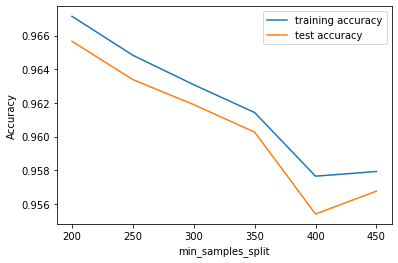

In [162]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [163]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [164]:
# Fit the grid search to the data
grid_search.fit(X_tr, y_tr)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 27.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [165]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.957600341588386 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


Fitting the final model with the best parameters obtained from grid search.

In [166]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [167]:
# fit
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
# predict
predictions = rfc.predict(X_test)

In [169]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20077
         1.0       0.11      0.00      0.00       883

    accuracy                           0.96     20960
   macro avg       0.53      0.50      0.49     20960
weighted avg       0.92      0.96      0.94     20960



In [171]:
print(confusion_matrix(y_test,predictions))

[[20069     8]
 [  882     1]]


In [172]:
print(accuracy_score(y_test,predictions))

0.9575381679389313


# Model Selection

Logistic Regression on Master data(Demographics + CreditBureau Data) performed well.
so selecting Logistic Reggression Model for the buissness problem.

# Creating Application ScoreCard

Building application scorecard with the good to bad odds of 10 to 1 at a score of 400 doubling every 20 points using logistic regression model

In [173]:
#calculating factor and Offset
target_score=400
target_odds=10
pts_double_odds=20

factor=pts_double_odds/np.log(2)
offset=target_score-factor*np.log(target_odds)

Odd_good=(1-y_train_pred)/y_train_pred

In [174]:
#assigning Scores 
y_train_pred_final['score']=offset+factor*np.log(Odd_good)

In [175]:
y_train_pred_final.head()

,Performance,performance_prob,Application ID,predicted_performance,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,score
0,0.0,0.270034,16415,0,1,1,1,0,0,0,0,0,0,0,0,362.255265
1,0.0,0.566470,34570,1,1,1,1,1,1,1,0,0,0,0,1,325.844066
2,1.0,0.705305,61611,1,1,1,1,1,1,1,1,1,0,0,1,308.380957
3,0.0,0.239602,1771,0,1,1,1,0,0,0,0,0,0,0,0,366.883707
4,0.0,0.242535,10562,0,1,1,1,0,0,0,0,0,0,0,0,366.421220


In [176]:
#Selecting Cutoff for accepting or rejecting an application
CUTOFF_SCORE= 400 + ( 20/(np.log(20)-np.log(10))* (np.log((1-0.50)/0.5) - np.log(10)))
CUTOFF_SCORE

333.56143810225274

cutoff score is 333.56 for selecting or rejecting an application

In [177]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Performance, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Performance, y_train_pred_final.final_predicted )
confusion2


array([[26569, 20271],
       [  637,  1427]], dtype=int64)

### Applying Logistic Regression to rejected Applications i.e Performnace Tag Missing Applications

In [178]:
#Merging rejected_demographics, rejected_credit dataframes
Master_Data_rejected=pd.merge(rejected_demographics, rejected_credit, on=['Application ID'], how='inner')

applying WOE Values to Master_Data_rejected

In [179]:
#function to assign woe values to  Master_Data_woe dataset.
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    small_df = small_df[~(small_df.MIN_VALUE.isnull())]
    small_df = small_df[~(small_df.MAX_VALUE.isnull())]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
           Master_Data_rejected[var] = Master_Data_rejected[var].apply(lambda x: eval(replace_cmd))
        except:
           Master_Data_rejected[var] = Master_Data_rejected[var].apply(lambda x: eval(replace_cmd1))

In [180]:
Master_Data_rejected.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,-0.004615,0.031580,-0.010094,0.023383,0.005419,0.289040,0.017390,-0.028033,-0.004319,0.206757,...,0.368415,0.400627,0.395652,0.292629,0.182735,0.001235,0.088272,0.332417,0.011973,0
1,0.004596,-0.007368,0.032129,-0.003997,-0.010384,0.056684,0.007904,0.091379,-0.004319,0.206757,...,0.228323,0.400627,0.395652,0.292629,0.368408,0.001235,0.088272,0.210325,0.011973,0
2,-0.004615,-0.007368,-0.010094,-0.003997,0.005419,0.289040,-0.017933,0.091379,-0.004319,-0.252890,...,0.228323,0.400627,0.395652,-0.320076,0.182735,0.001235,-0.093345,0.210325,0.011973,0
3,-0.004615,-0.007368,-0.010094,-0.003997,0.005419,0.056684,0.007904,-0.028033,-0.004319,-0.252890,...,0.228323,-0.314635,0.395652,0.292629,0.368408,0.001235,0.088272,0.210325,0.011973,0
4,0.004596,-0.007368,0.032129,-0.003997,-0.010384,0.056684,-0.029557,-0.028033,-0.004319,-0.252890,...,0.228323,0.400627,0.395652,0.292629,0.368408,0.001235,0.088272,0.210325,-0.138237,0


In [181]:
Master_Data_rejected=Master_Data_rejected.drop(['Performance Tag_x','Performance Tag_y','Application ID'],axis=1)

In [182]:
## making prediction probabilities
rejected_pred = model.predict_proba(Master_Data_rejected)[:,1]

In [183]:
rejected_pred

array([0.66130873, 0.66316954, 0.74256875, ..., 0.63462528, 0.66617364,
       0.65882052])

In [184]:
rejected_pred_df = pd.DataFrame(rejected_pred)
rejected_pred_df.head()

,0
0,0.661309
1,0.663170
2,0.742569
3,0.681704
4,0.695522


In [185]:
# Making y dataframe as 1 as all these records are assumed to be defaulters 
rejected_pred_df_1 = pd.DataFrame(pd.Series(np.ones(Master_Data_rejected.shape[0], dtype = np.int)))
rejected_pred_df_1= rejected_pred_df_1.rename(columns={ 0 : 'Performance_Tag'})


rejected_pred_df_1['unique_id'] = rejected_pred_df_1.index+1

# Appending y_additional_df and y_additional_pred
rejected_pred_df = pd.concat([rejected_pred_df_1, rejected_pred_df],axis=1)
rejected_pred_df.head()

,Performance_Tag,unique_id,0
0,1,1,0.661309
1,1,2,0.663170
2,1,3,0.742569
3,1,4,0.681704
4,1,5,0.695522


In [186]:
# Renaming the column 
rejected_pred_df_1= rejected_pred_df.rename(columns={ 0 : 'Performance_Prob'})
rejected_pred_df_1.head()

,Performance_Tag,unique_id,Performance_Prob
0,1,1,0.661309
1,1,2,0.663170
2,1,3,0.742569
3,1,4,0.681704
4,1,5,0.695522


In [187]:
## evaluating result based on the cut-off value obtained above
rejected_pred_df_1['final_predicted'] = rejected_pred_df_1.Performance_Prob.map(lambda x: 1 if x > 0.50 else 0)
rejected_pred_df_1.head()

,Performance_Tag,unique_id,Performance_Prob,final_predicted
0,1,1,0.661309,1
1,1,2,0.663170,1
2,1,3,0.742569,1
3,1,4,0.681704,1
4,1,5,0.695522,1


In [188]:
wrongly_rejected=sum(rejected_pred_df_1['final_predicted']==0)
wrongly_rejected

6

Total number of rejected customers by bank : 1425

Customer should be given Credit card based on credit score

No : 1419
Yes : 6

Credit Score Cut off : 333.56

# Financial benefit of the model

In [201]:
#No.of applicants above score 333.58
App_above_cutoff=sum((y_train_pred_final['score'])>333.58)
App_above_cutoff

27202

In [202]:
#No.of applicants below score 333.58
App_below_cutoff=sum((y_train_pred_final['score'])<333.58)
App_below_cutoff

21702

#### Revenue Loss for bank

Let us assume bank makes Rs.5000 per year from 1 credit card customer.

Bank refused 6 potential credit card customer,amounting to Rs.30,000 annual loss to the bank. 

#### Financial Benefit of a model will be in terms of either
 a. decreasing the rejection the non-defaulters
 
 b. increasing the rejection of defaulters

### Net Profit when no model is considered

Considering an average loss of Rs.5000 when each non defaulters application is rejected
and an average loss of Rs.1,00,000 when each accepted applicant defaults

In [203]:
original_performance_tag_good=sum(Master_Data['Performance Tag_x']==0)
original_performance_tag_good

66917

In [204]:
original_performance_tag_bad=sum(Master_Data['Performance Tag_x']==1)
original_performance_tag_bad

2947

In [205]:
Profit_without_model=(66917*5000)-(2947*100000)
Profit_without_model

39885000

Profit without model is 39885000

### Profit with model on the dataset without records with no performance tag using confusion matrix

    0       1
    
0  [[26569 20271]

1  [  637  1427]]

In [206]:
Profit_with_model=(26569*5000)+(1427*100000)-(20271*5000)-(637*100000)
Profit_with_model

110490000

### Net financial gain due to using our model

In [207]:
Net_financial_gain=Profit_with_model-Profit_without_model
Net_financial_gain

70605000

net financial gain due to using the model is 70605000

In [208]:
Percentage_financial_gain=Net_financial_gain*100/Profit_without_model
Percentage_financial_gain


177.02143663031214

percentage of financial gain by using model is 177.02

#### REVENUE LOSS:

Revenue loss occurs when good customers are identified as bad and their credit card application is rejected.

No of candidates rejected by the model who didn't default - 637

Total No of candidates who didn't default - 26569+ 637 = 27206


In [209]:
Revenue_loss = (637/(27206))*100
Revenue_loss

2.3413952804528413

2.34% of the non defaulting customers are rejected which resulted in revenue loss.

### CREDIT LOSS:

The candidates who have been selected by the bank and have defaulted are responsible for the credit loss to the bank.

Credit loss without model

In [210]:
per_of_candidates_approved_and_then_defaulted = 0.976-0.065
per_of_candidates_approved_and_then_defaulted

0.911

Credit loss with model

In [211]:
per_of_candidates_approved_and_then_defaulted_model = (20271/48898) 
per_of_candidates_approved_and_then_defaulted_model

0.41455683259028997

Credit loss saved using the model is 0.50

# Conclusions

Logistic regression model performs better than other models hence Logistic regression model is considered as final model on master daset.
    #Final Cutoff = 0.50
    #sensitivity=69%
    #specificity=56%
    #Accuracy = 57% 
    #AUC = 0.67
   


Application scorecard is built on logistic regression model.
    # Cutoff score = 333.56

 Financial assesment
    #Net_financial_gain = #Rs.70605000
    #Percentage_financial_gain = #177.02%
    #Revenue_loss = 2.34% of the non defaulting records are rejected which resulted in revenue loss.
    #Credit loss saved = 0.50
